In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

train_labels = r'C:\Users\msanj\cancer\train_labels.csv'

df = pd.read_csv(train_labels)

print(df['label'].value_counts(),
      '\n\n', df.describe(),
      '\n\n', df.head())

df["id"]=df["id"].apply(lambda x : x +".tif")
df['label'] = df['label'].astype('str')
df.head()

Using TensorFlow backend.


0    130908
1     89117
Name: label, dtype: int64 

                label
count  220025.000000
mean        0.405031
std         0.490899
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000 

                                          id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0


,id,label
0,f38a6374c348f90b587e046aac6079959adf3835.tif,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77.tif,1
2,755db6279dae599ebb4d39a9123cce439965282d.tif,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08.tif,0
4,068aba587a4950175d04c680d38943fd488d6a9d.tif,0


In [7]:
val = .15

datagen= ImageDataGenerator(
    rescale=1./255,
    samplewise_std_normalization= True,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    channel_shift_range=0.1,
    validation_split=val)

train_generator=datagen.flow_from_dataframe(
    dataframe=df,
    directory= r'C:\Users\msanj\cancer\train',
    x_col="id",
    y_col="label",
    subset="training",
    batch_size=128,
    shuffle=True,
    class_mode="binary",
    target_size=(96,96))



valid_generator=datagen.flow_from_dataframe(
    dataframe=df,
    directory= r'C:\Users\msanj\cancer\train',
    x_col="id",
    y_col="label",
    subset="validation",
    batch_size=128,
    shuffle=True,
    class_mode="binary",
    target_size=(96,96))



C:\Users\msanj\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:355: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 187022 validated image filenames belonging to 2 classes.
Found 33003 validated image filenames belonging to 2 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,Adamax,Nadam

import os

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import load_model
from keras.preprocessing import image

IMG_SIZE=96
model = tf.keras.Sequential([
     
    tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu', input_shape=[IMG_SIZE,IMG_SIZE, 3]),
    tf.keras.layers.Conv2D(kernel_size=3, filters=30, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=60, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=90, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=110, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=130, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=40, padding='same', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1,'sigmoid')
])

from keras.optimizers import Adam,Adamax,Nadam



model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=5,
                    validation_data=valid_generator)

test_path = r'C:\Users\msanj\cancer\test'

df_test = pd.read_csv(r'C:\Users\msanj\cancer\sample_submission.csv')
df_test["id"]=df_test["id"].apply(lambda x : x +".tif")

test_datagen = ImageDataGenerator(rescale=1./255,
                                 samplewise_std_normalization= True)

test_datagen= ImageDataGenerator(
    rescale=1./255,
    samplewise_std_normalization= True,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    channel_shift_range=0.1)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=test_path,
    x_col="id",
    y_col=None,
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=128,
    class_mode=None,
    shuffle=False)



Epoch 1/5
1462/1462 [==============================] - 2734s 2s/step - loss: 0.4118 - acc: 0.8103 - val_loss: 0.3524 - val_acc: 0.8495
Epoch 2/5
1462/1462 [==============================] - 2502s 2s/step - loss: 0.2976 - acc: 0.8745 - val_loss: 0.2907 - val_acc: 0.8759
Epoch 3/5
1462/1462 [==============================] - 2500s 2s/step - loss: 0.2628 - acc: 0.8919 - val_loss: 0.2486 - val_acc: 0.8975
Epoch 4/5
1462/1462 [==============================] - 2500s 2s/step - loss: 0.2422 - acc: 0.9018 - val_loss: 0.2393 - val_acc: 0.9039
Epoch 5/5
1462/1462 [==============================] - 2493s 2s/step - loss: 0.2284 - acc: 0.9089 - val_loss: 0.2196 - val_acc: 0.9130
Found 57458 validated image filenames.


In [9]:
test_generator.reset()
pred=model.predict_generator(test_generator,steps=450,verbose=1).ravel()

results = dict(zip(test_generator.filenames, pred))

results

import glob
import os

path=glob.glob(r"C:\Users\msanj\cancer\test\*.tif")
file=os.listdir(r'C:\Users\msanj\cancer\test')

results1={}
for i in range(70):
  results1[file[i]]=(results[file[i]])*100

results1



450/450 [==============================] - 306s 679ms/step


{'00006537328c33e284c973d7b39d340809f7271b.tif': 99.78957176208496,
 '0000ec92553fda4ce39889f9226ace43cae3364e.tif': 95.75783610343933,
 '00024a6dee61f12f7856b0fc6be20bc7a48ba3d2.tif': 18.617084622383118,
 '000253dfaa0be9d0d100283b22284ab2f6b643f6.tif': 30.45615553855896,
 '000270442cc15af719583a8172c87cd2bd9c7746.tif': 4.521659016609192,
 '000309e669fa3b18fb0ed6a253a2850cce751a95.tif': 6.399911642074585,
 '000360e0d8358db520b5c7564ac70c5706a0beb0.tif': 27.8335839509964,
 '00040095a4a671280aeb66cb0c9231e6216633b5.tif': 19.24624741077423,
 '000698b7df308d75ec9559ef473a588c513a68aa.tif': 52.166932821273804,
 '0006e1af5670323331d09880924381d67d79eda0.tif': 90.87167978286743,
 '000997a6038fa7441aa0111ac456255060a354c4.tif': 3.4542888402938843,
 '000c8db3e09f1c0f3652117cf84d78aae100e5a7.tif': 2.3089706897735596,
 '000de14191f3bab4d2d6a7384ca0e5aa5dc0dffe.tif': 70.53453326225281,
 '000e6341cf18365d35b40f4991002fec8834afc0.tif': 55.148911476135254,
 '0010e2887e0b977fcdfdf4c50564fafbbc2b6208.t

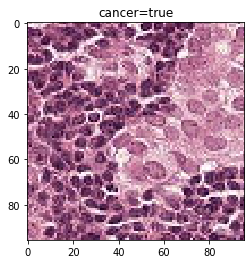

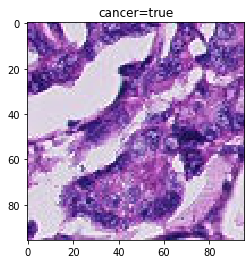

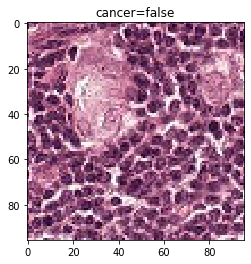

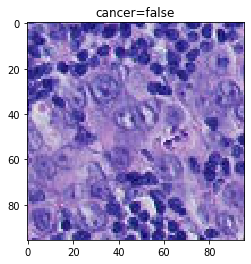

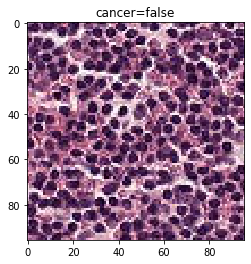

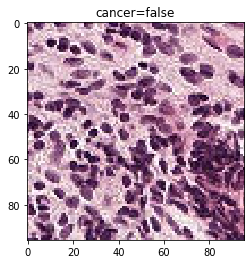

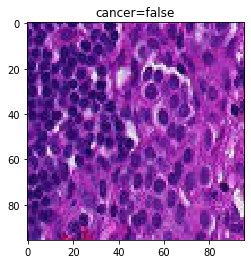

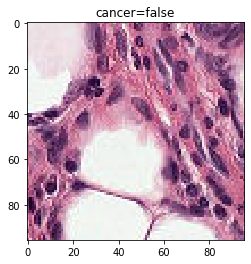

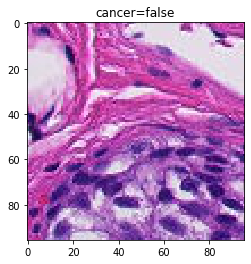

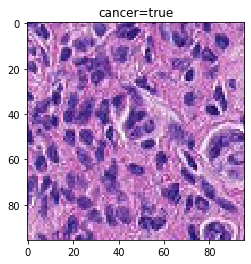

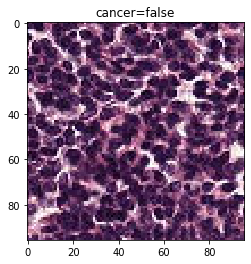

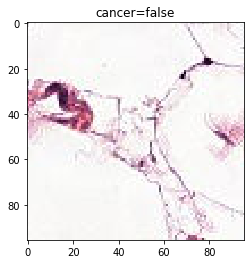

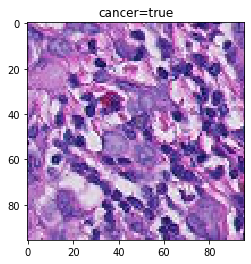

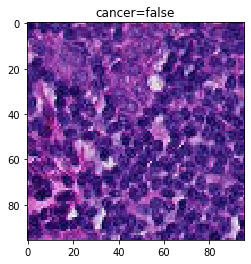

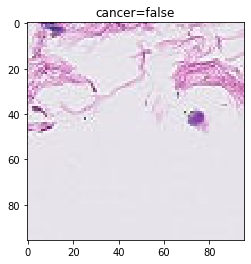

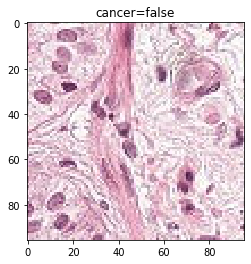

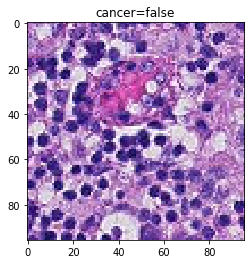

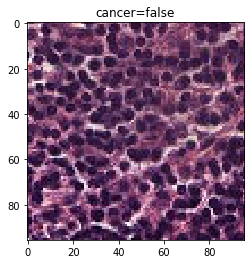

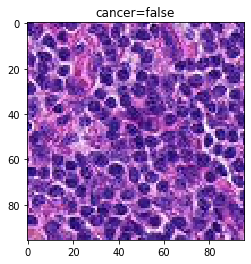

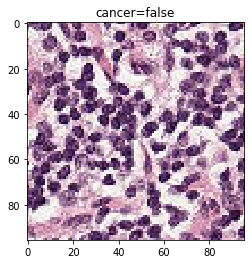

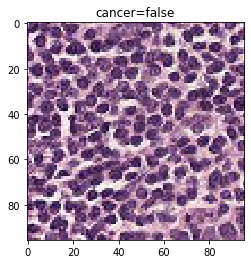

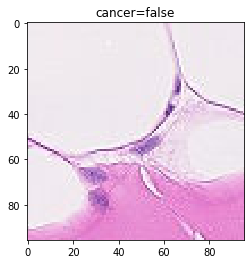

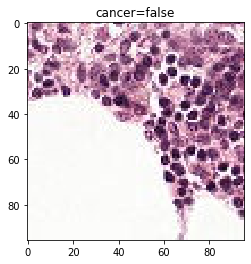

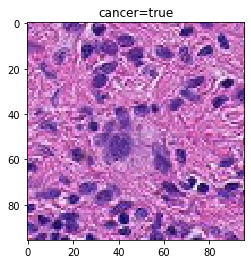

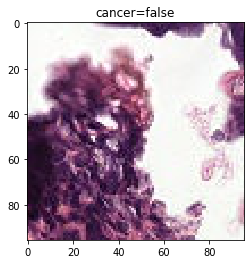

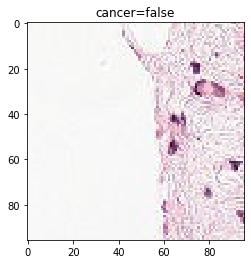

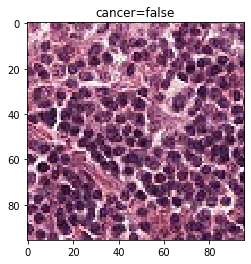

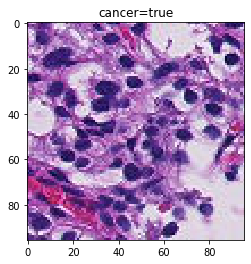

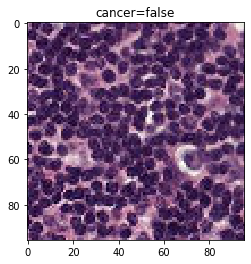

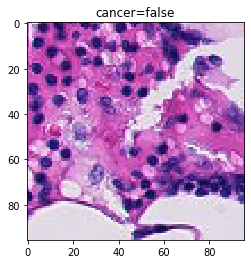

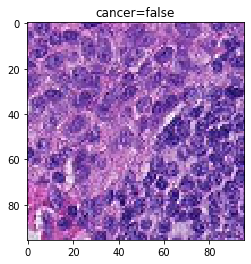

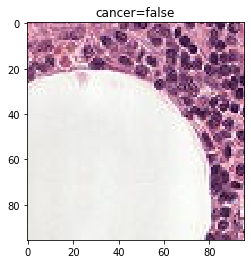

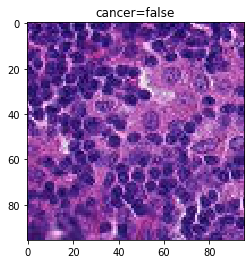

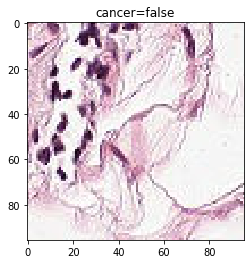

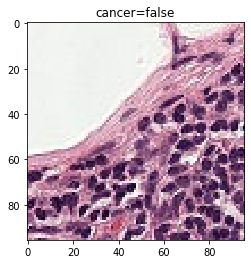

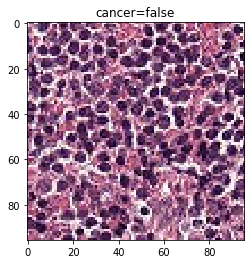

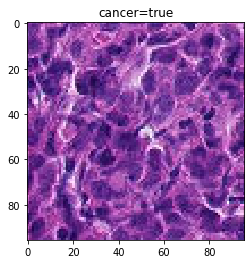

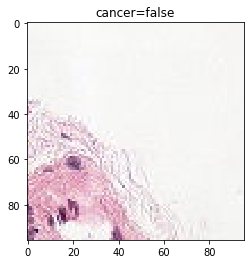

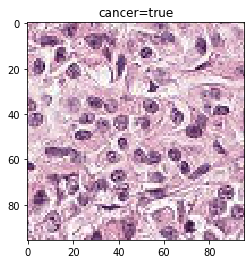

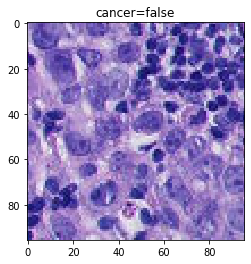

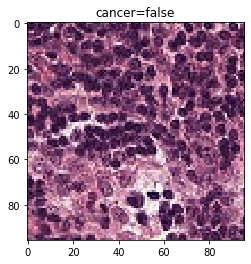

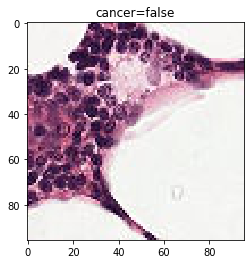

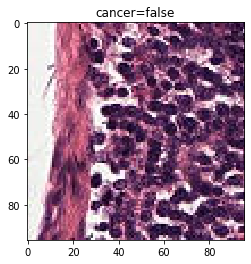

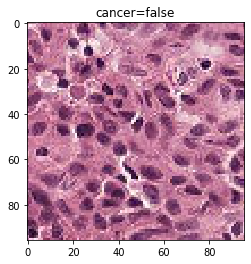

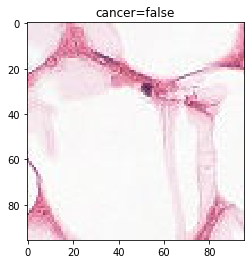

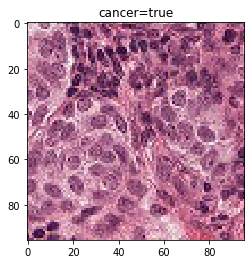

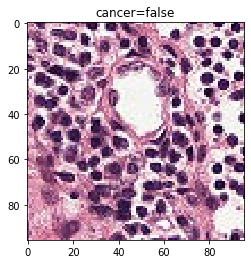

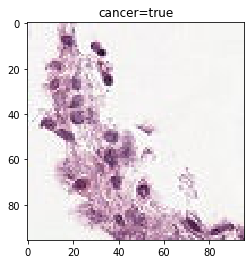

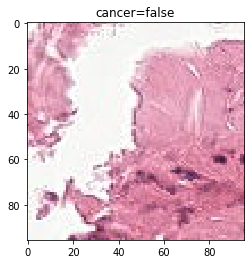

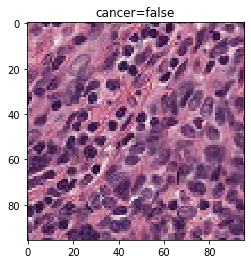

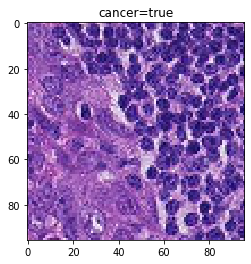

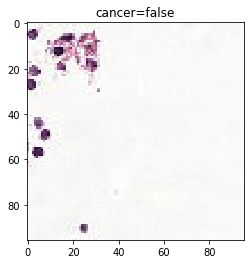

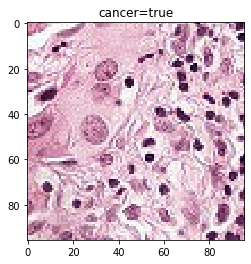

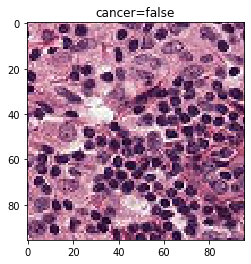

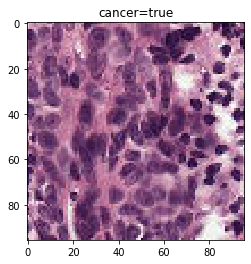

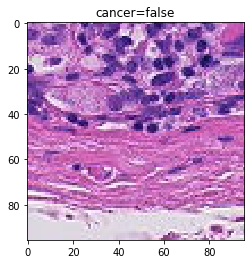

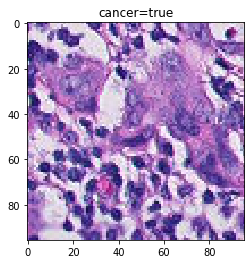

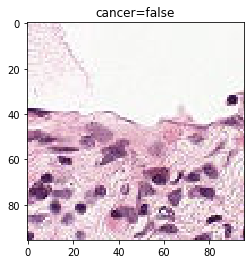

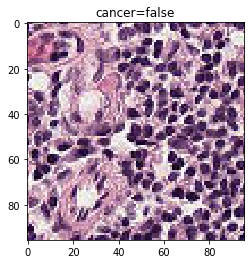

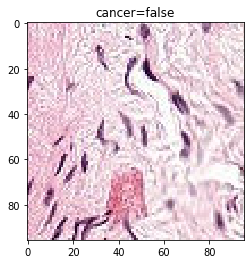

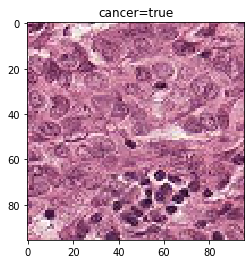

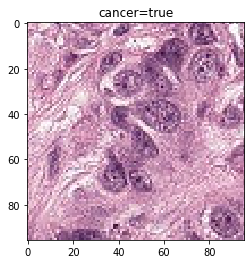

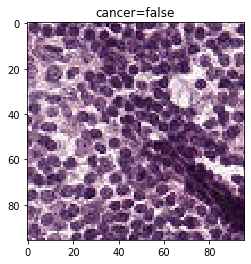

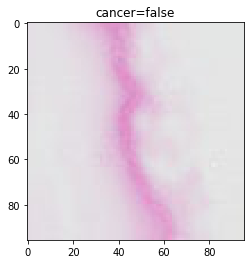

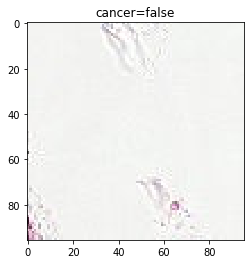

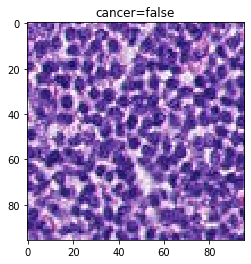

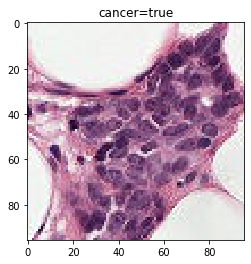

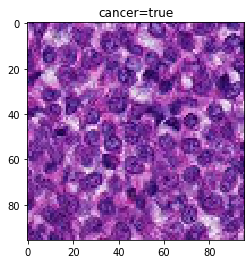

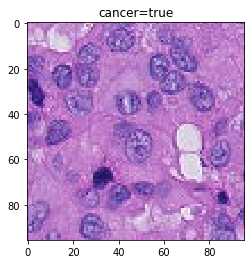

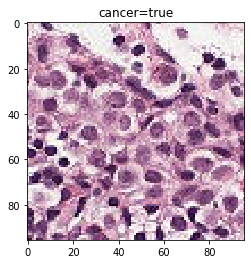

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(70):
  img = mpimg.imread(path[i])
  plt.show()
  if(results1[file[i]]>60):
    plt.title('cancer=true')
  else:
    plt.title('cancer=false')
  plt.imshow(img)






In [12]:
temp=model.save(r'C:\Users\msanj\cancer\sequential.h5')
df=pd.DataFrame(list(results1.items()))
df.to_csv(r"C:\Users\msanj\cancer\results_seq.csv", index=False)
df.head()

,0,1
0,00006537328c33e284c973d7b39d340809f7271b.tif,99.789572
1,0000ec92553fda4ce39889f9226ace43cae3364e.tif,95.757836
2,00024a6dee61f12f7856b0fc6be20bc7a48ba3d2.tif,18.617085
3,000253dfaa0be9d0d100283b22284ab2f6b643f6.tif,30.456156
4,000270442cc15af719583a8172c87cd2bd9c7746.tif,4.521659
